In [14]:
import pandas as pd

setup = ['implementation', 'solver', 'satisfied', 'violated', 'num_txn', 'num_keys', 'num_values', 'num_sessions']

df = pd.read_csv("/home/mane/Desktop/vldb-experiments/data.csv")
df.head()

,implementation,solver,satisfied,violated,num_txn,num_keys,num_values,num_sessions,time_ms,candidates,date
0,default,sat4j,RA_Biswas,RA_Cerone,3,3,3,3,381,8,19/05/2025 10:31:39
1,default,sat4j,RA_Biswas,RA_Cerone,3,3,3,3,165,8,19/05/2025 10:31:39
2,default,sat4j,RA_Biswas,RA_Cerone,3,3,3,3,143,8,19/05/2025 10:31:39
3,default,glucose,RA_Biswas,RA_Cerone,3,3,3,3,100,8,19/05/2025 10:31:39
4,default,glucose,RA_Biswas,RA_Cerone,3,3,3,3,86,8,19/05/2025 10:31:39


In [15]:
# Make sure all different setups have the same number of measurements
counts = df.groupby(setup).size()
assert counts.nunique() == 1, "Not all setups have the same number of measurements"

In [16]:
# Make sure each setup always results in the same number of candidates
grouped = df.groupby(setup)['candidates'].nunique()
assert (grouped == 1).all(), "Not all groups have a consistent 'candidates' value"

In [19]:
agg_times = df.groupby(setup)['time_ms'].agg(
    avg_time_ms='mean',
    min_time_ms='min',
    max_time_ms='max'
)

agg_times

avg_time_ms  \
implementation solver  satisfied  violated   num_txn num_keys num_values num_sessions                
default        glucose CC_Biswas  CC_Cerone  3       3        3          3               77.333333   
                                             4       3        3          3              226.000000   
                       PC_Biswas  PC_Cerone  3       3        3          3               61.666667   
                                             4       3        3          3              115.333333   
                       RA_Biswas  RA_Cerone  3       3        3          3               93.333333   
                                             4       3        3          3              490.666667   
                       SER_Biswas SER_Cerone 3       3        3          3               11.666667   
                                             4       3        3          3               15.000000   
                       SI_Biswas  SI_Cerone  3       3        3          3               55.666667   
                                             4       3        3          3              172.000000   
               minisat CC_Biswas  CC_Cerone  3       3        3          3               65.000000   
                                             4       3        3          3              190.000000   
                       PC_Biswas  PC_Cerone  3       3        3          3               47.000000   
                                             4       3        3          3              132.000000   
                       RA_Biswas  RA_Cerone  3       3        3          3              114.666667   
                                             4       3        3          3              304.666667   
                       SER_Biswas SER_Cerone 3       3        3          3               10.000000   
                                             4       3        3          3               16.000000   
                       SI_Biswas  SI_Cerone  3       3        3          3               53.333333   
                                             4       3        3          3              184.333333   
               sat4j   CC_Biswas  CC_Cerone  3       3        3          3              117.666667   
                                             4       3        3          3              417.666667   
                       PC_Biswas  PC_Cerone  3       3        3          3               86.000000   
                                             4       3        3          3              239.666667   
                       RA_Biswas  RA_Cerone  3       3        3          3              229.666667   
                                             4       3        3          3              623.000000   
                       SER_Biswas SER_Cerone 3       3        3          3               13.333333   
                                             4       3        3          3               18.666667   
                       SI_Biswas  SI_Cerone  3       3        3          3               95.000000   
                                             4       3        3          3              411.666667   

                                                                                       min_time_ms  \
implementation solver  satisfied  violated   num_txn num_keys num_values num_sessions                
default        glucose CC_Biswas  CC_Cerone  3       3        3          3                      72   
                                             4       3        3          3                     225   
                       PC_Biswas  PC_Cerone  3       3        3          3                      61   
                                             4       3        3          3                     114   
                       RA_Biswas  RA_Cerone  3       3        3          3                      86   
                                             4       3        3          3                     421   
      

In [21]:
agg_candidates = df.groupby(setup)['candidates'].first()
agg_candidates

implementation  solver   satisfied   violated    num_txn  num_keys  num_values  num_sessions
default         glucose  CC_Biswas   CC_Cerone   3        3         3           3                8
                                                 4        3         3           3               45
                         PC_Biswas   PC_Cerone   3        3         3           3                7
                                                 4        3         3           3               25
                         RA_Biswas   RA_Cerone   3        3         3           3                8
                                                 4        3         3           3               71
                         SER_Biswas  SER_Cerone  3        3         3           3                1
                                                 4        3         3           3                2
                         SI_Biswas   SI_Cerone   3        3         3           3                7
                

In [24]:
grouped = pd.concat([agg_times, agg_candidates], axis=1).reset_index()
grouped.head()

,implementation,solver,satisfied,violated,num_txn,num_keys,num_values,num_sessions,avg_time_ms,min_time_ms,max_time_ms,candidates
0,default,glucose,CC_Biswas,CC_Cerone,3,3,3,3,77.333333,72,82,8
1,default,glucose,CC_Biswas,CC_Cerone,4,3,3,3,226.000000,225,227,45
2,default,glucose,PC_Biswas,PC_Cerone,3,3,3,3,61.666667,61,62,7
3,default,glucose,PC_Biswas,PC_Cerone,4,3,3,3,115.333333,114,117,25
4,default,glucose,RA_Biswas,RA_Cerone,3,3,3,3,93.333333,86,100,8


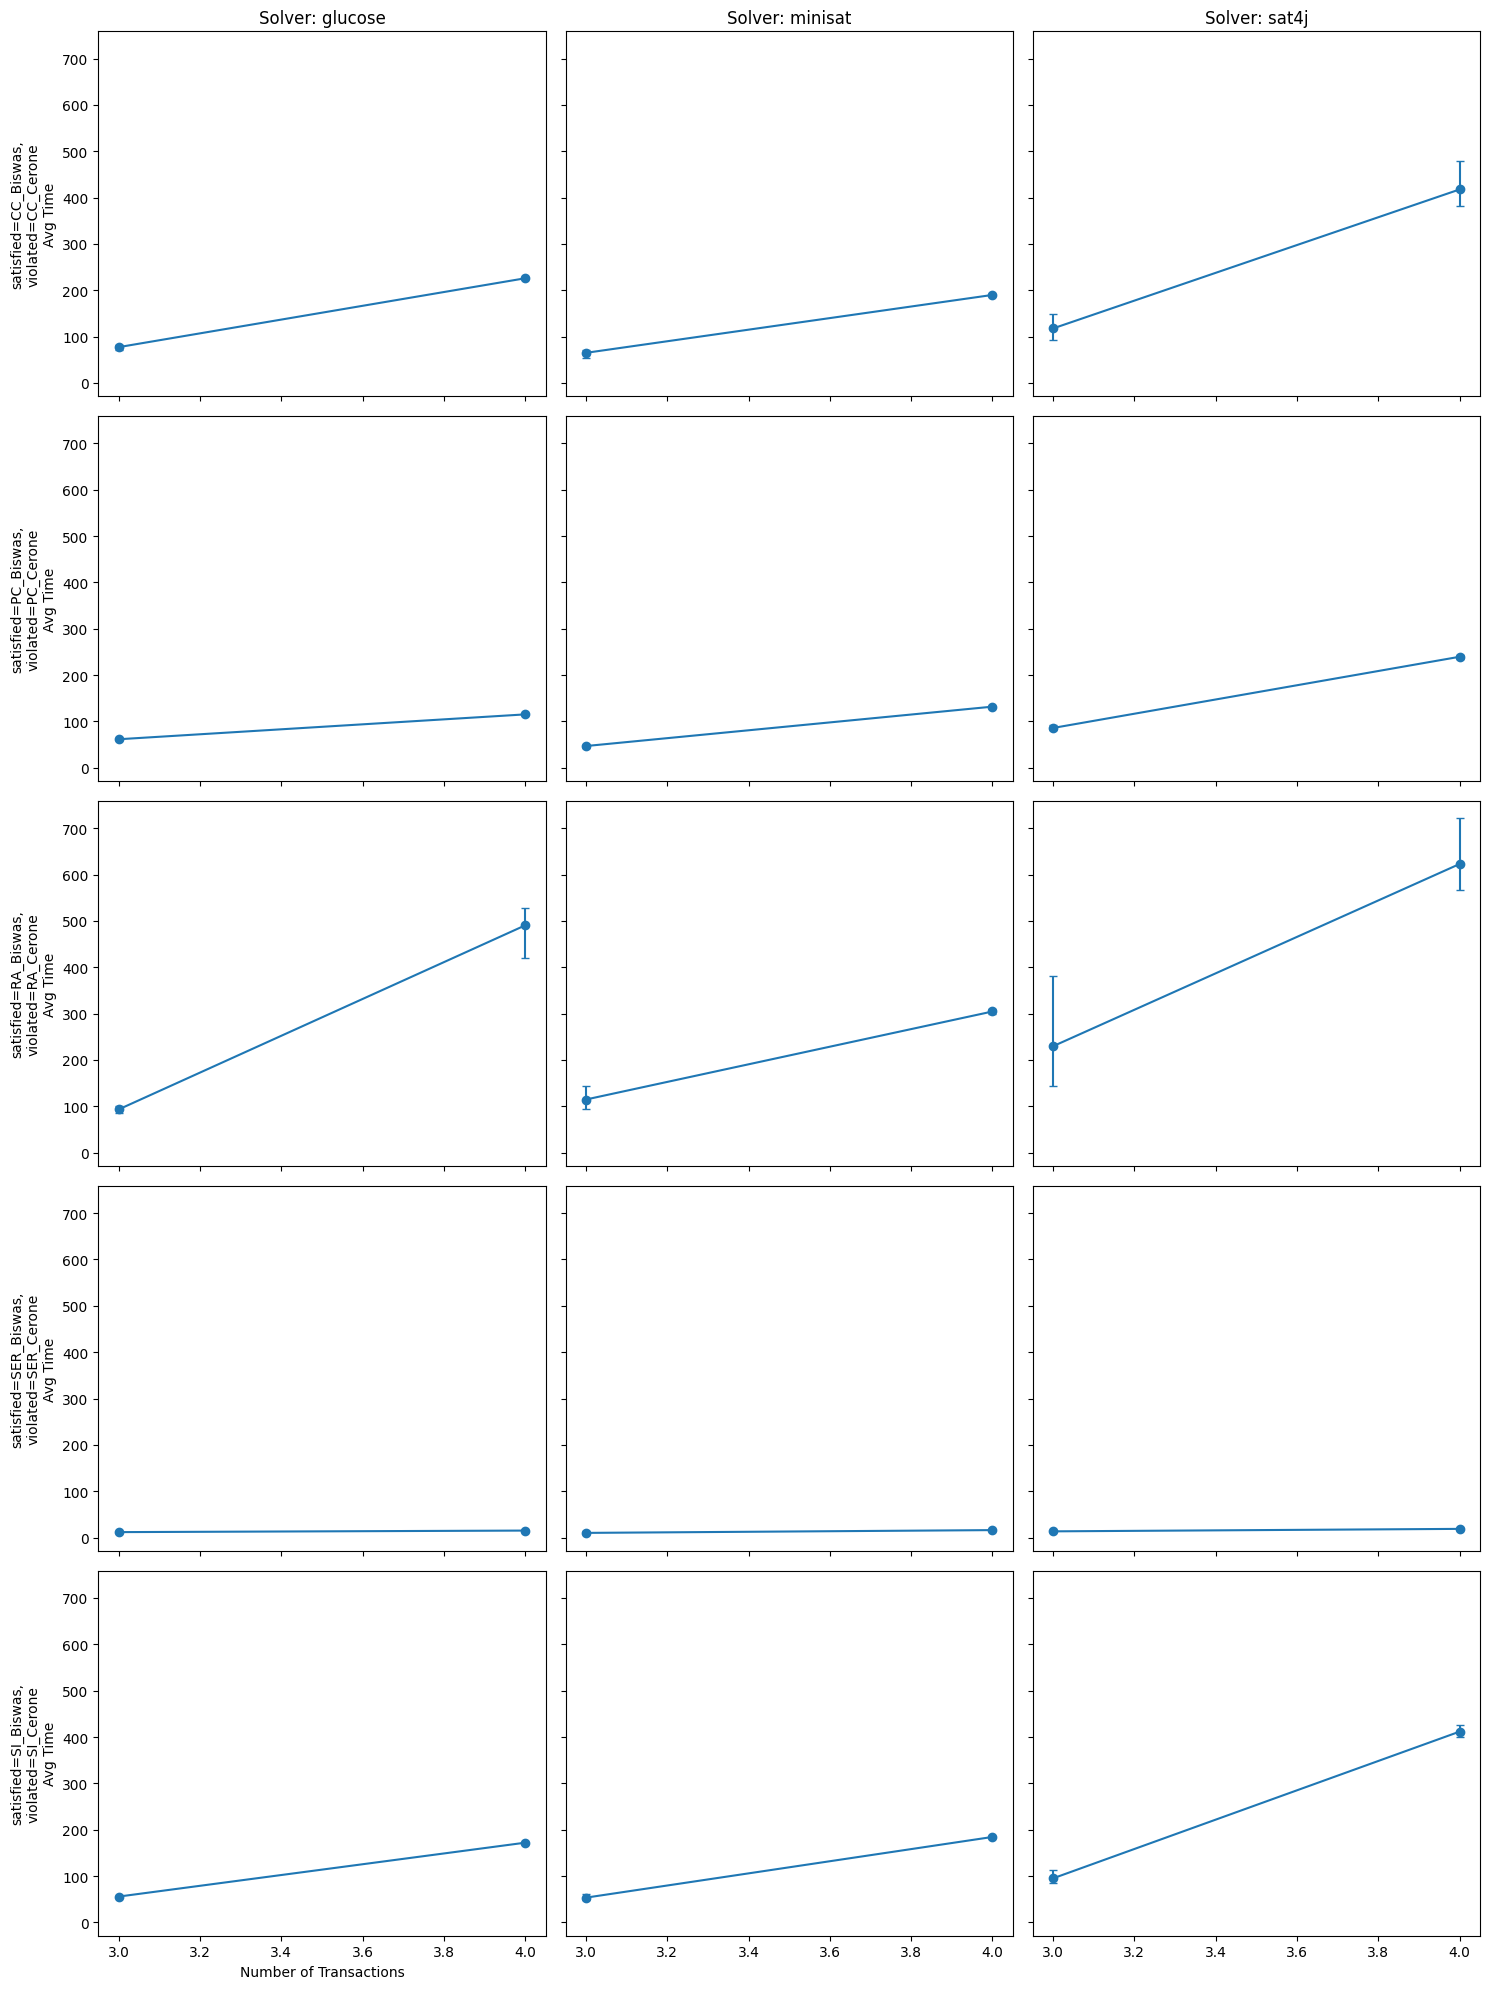

In [28]:
import matplotlib.pyplot as plt

agg = grouped

# Get all unique values to define subplot grid
row_keys = agg[['satisfied', 'violated']].drop_duplicates()
col_keys = agg['solver'].unique()

# Create subplot grid
n_rows = len(row_keys)
n_cols = len(col_keys)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=True, sharey=True)

# If only one row or column, make axes 2D
if n_rows == 1:
    axes = axes[np.newaxis, :]
if n_cols == 1:
    axes = axes[:, np.newaxis]

# Plot each subplot
for i, (_, row) in enumerate(row_keys.iterrows()):
    for j, solver in enumerate(col_keys):
        ax = axes[i, j]

        subset = agg[
            (agg['satisfied'] == row['satisfied']) &
            (agg['violated'] == row['violated']) &
            (agg['solver'] == solver)
        ]
        ax.errorbar(
            subset['num_txn'],
            subset['avg_time_ms'],
            yerr=[
                subset['avg_time_ms'] - subset['min_time_ms'],
                subset['max_time_ms'] - subset['avg_time_ms']
            ],
            fmt='o-', capsize=3
        )
        # Only the top row gets titles
        if i == 0:
            ax.set_title(f"Solver: {solver}")

        # Only the left-most column gets y-axis labels
        if j == 0:
            ax.set_ylabel(f"satisfied={row['satisfied']},\nviolated={row['violated']}\nAvg Time")
        else:
            ax.set_ylabel("")

        # Only the bottom-left gets x-axis label
        if i == n_rows - 1 and j == 0:
            ax.set_xlabel("Number of Transactions")
        else:
            ax.set_xlabel("")

plt.tight_layout()
plt.show()